In [2]:
# 필요 라이브러리 설치
!pip3 install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [3]:
# 라이브러리와 폰트를 로드
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# MacOS에서는 기본 한글 폰트로 AppleGothic 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지


## **문제 1 (난이도: 하): 게임 아이템 뽑기 확률, 정말 10%일까?**

**시나리오:**
어떤 게임 개발사에서 새로운 아이템의 뽑기 확률이 10%로 설정되었다고 주장하고 있습니다. 유저 커뮤니티에서는 "실제 확률은 10%보다 낮은 것 같다"는 의혹이 제기되었습니다. 이를 확인하기 위해 한 유저가 아이템을 200번 뽑았고, 그중 12번 성공했습니다.

### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이항검정(Binomial Test)을 사용하여, 이 유저의 결과(200번 중 12번 성공)가 개발사의 주장(P=0.1)을 기각하고 "확률이 10%보다 낮은 것 같다"는 의혹을 뒷받침할 만큼 통계적으로 유의미한지 검증하세요.


In [4]:
# 문제 설정
n = 200     # 총 시행 횟수
x = 12      # 관찰된 성공 횟수
p = 0.1     # 귀무가설에서의 성공 확률

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): p = 0.10
# H₁ (대립가설): p < 0.10 (의혹: 실제 확률이 10%보다 낮다 → 단측검정, alternative='less')

# [작성] 이항검정을 수행하고 p-값을 계산하세요.
# '확률이 더 낮은 것 같다'는 주장을 검증하려면 alternative 인수를 어떻게 설정해야 할까요?
p_value = stats.binomtest(x, n, p, alternative='less').pvalue

print(f"관찰 결과: {n}번 시도 중 {x}번 성공")
print(f"검정 결과 p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print("결론: p-value < 0.05 → 귀무가설 기각. 실제 확률이 10%보다 낮다는 주장에 통계적으로 유의미한 근거가 있습니다.")
else:
    print("결론: p-value >= 0.05 → 귀무가설 기각 불가. 실제 확률이 10%보다 낮다고 보기 어렵습니다.")

관찰 결과: 200번 시도 중 12번 성공
검정 결과 p-value: 0.0320
결론: p-value < 0.05 → 귀무가설 기각. 실제 확률이 10%보다 낮다는 주장에 통계적으로 유의미한 근거가 있습니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** Part 1에서 계산된 p-값의 의미를 직접 눈으로 확인해 봅시다. **"만약 개발사의 주장대로 실제 확률이 정말 10%라면"**, 200번 뽑기를 했을 때 성공 횟수가 어떻게 분포하는지 시뮬레이션을 통해 알아보고, 우리가 관찰한 '12번 성공'이 얼마나 희귀한 일인지 확인하세요.


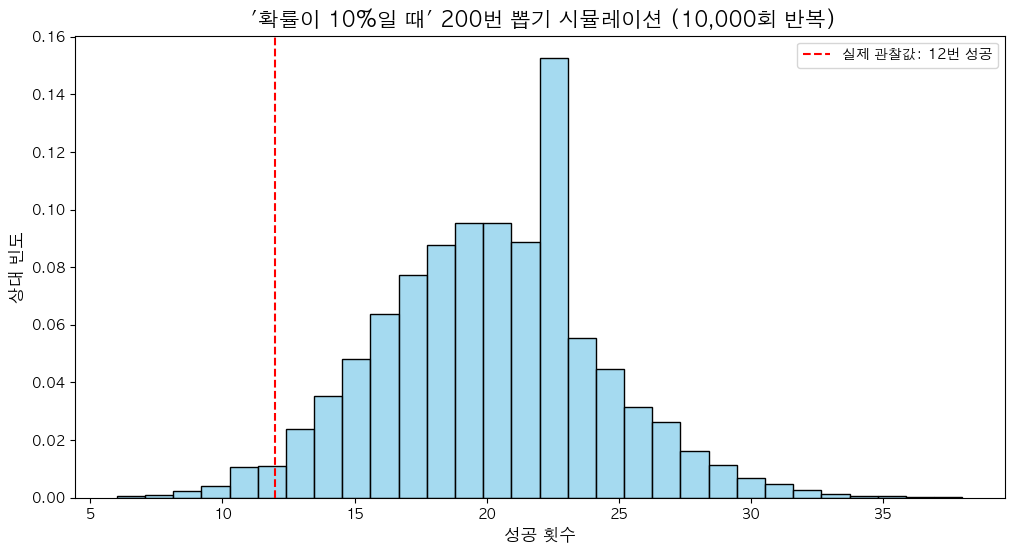

In [5]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 실제 확률 p = 0.1
# 200번 뽑기를 10,000번 수행
num_simulations = 10000

# [작성]] numpy의 이항분포 랜덤 함수를 사용하여 시뮬레이션 결과를 생성하세요.
simulated_successes = np.random.binomial(n=n, p=p, size=num_simulations)

# 2. 시각화
plt.figure(figsize=(12, 6))
# [작성] 시뮬레이션 결과(simulated_successes)를 히스토그램으로 그리세요.
sns.histplot(simulated_successes, bins=30, stat='probability', color='skyblue')

plt.axvline(x=x, color='red', linestyle='--', label=f'실제 관찰값: {x}번 성공')
plt.title(" '확률이 10%일 때' 200번 뽑기 시뮬레이션 (10,000회 반복)", fontsize=15)
plt.xlabel("성공 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 1에서 구한 `p-value`는 Part 2 그래프의 어느 부분에 해당하며, 무엇을 의미하나요?  
-> 그래프에서 빨간 점선(12회 성공) 기준 왼쪽 꼬리 영역의 면적이다.  
-> p-value는 귀무가설이 참일 때(실제확률이 10%)일 때, 우리가 관찰한 값(12번 성공) 이하가 나올 확률을 뜻한다.  
-> 즉, "개발사가 주장한 확률이 맞다면 이렇게 적거나 더 적게 성공하 가능성이 얼마나 되는가?"를 수치로 표현한 것이 p-value이다.  

2.  시뮬레이션 그래프를 볼 때, 우리가 관찰한 '12회 성공'은 개발사의 주장이 맞다는 가정 하에 흔한 일인가요, 드문 일인가요?  
-> 시뮬레이션 분포의 중심은 약 20회 성공 근처인데, 실제 관찰값(12회 성공)은 왼쪽 꼬리 끝부분에 해당한다.  
-> 따라서 흔하지 않은 드문 사건이며, p-value = 0.032는 약 10,000번 중 3% 정도만 발생하는 경우임을 보여준다.  

3.  이 시뮬레이션 경험을 통해 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 어떻게 더 쉽게 설명할 수 있을까요?  
-> p-값은 "귀무가설이 맞다고 가정했을 때, 이렇게 극단적인 결과가 나올 확률"이다.  
-> 만약 그 확률이 아주 작다면(예: 5% 미만), 귀무가설이 참이라고 보기 어렵다 → 귀무가설을 기각한다  
-> 예를 들어, "동전을 10번 던졌을 때 앞면이 9번 나올 확률"은 매우 희박하다. 이런 결과가 실제로 일어나면, 우리는 동전이 공정하지 않을 수도 있다고 자연스럽게 의심하게 된다.


## **문제 2 (난이도: 하): 과자 한 봉지의 중량은 150g이 맞을까?**

**시나리오:**
한 식품 공장에서 생산하는 과자 한 봉지의 목표 중량은 150g입니다. 품질관리팀은 생산 공정이 목표 중량을 잘 맞추고 있는지 확인하기 위해, 생산된 과자 30봉지를 무작위로 추출하여 무게를 측정했습니다. (측정 데이터는 아래 코드에 제공)

### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 일표본 t-검정(One-sample t-Test)을 사용하여, 추출된 과자 샘플의 평균 무게가 목표 중량 150g과 통계적으로 유의미한 차이가 있는지 검증하세요.

In [ ]:
# 주어진 데이터
np.random.seed(42)
sample_weight = np.random.normal(loc=151.5, scale = 2, size = 30)   # loc=평균, scale=표준편차, size=샘플개수
pop_mean = 150  # 목표 중량 (모평균)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 과자 한 봉지의 중량은 150g이다.
# H₁ (대립가설): 과자 한 봉지의 중량은 150g이 아니다.

# [작성] 일표본 t-검정을 수행하여 t-통계량과 p-값을 구하세요.
t_statistic, p_value = stats.ttest_1samp(sample_weight, pop_mean)

print(f"샘플 평균 무게: {np.mean(sample_weight):.2f}g")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print("결론: 귀무가설 기각 → 과자 평균 중량이 150g과 통계적으로 유의한 차이가 있습니다.")
else:
    print("결론: 귀무가설 기각 불가 → 과자 평균 중량이 150g과 통계적으로 유의한 차이가 있다고 보기 어렵습니다.")


샘플 평균 무게: 151.12g
t-statistic: 3.4193
p-value: 0.0019
결론: 귀무가설 기각 → 과자 평균 중량이 150g과 통계적으로 유의한 차이가 있습니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설이 사실일 때, 즉 **"과자 봉지의 평균 무게가 정확히 150g이라면"** 어떤 결과들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 샘플 평균(약 151.5g)이 얼마나 특이한 값인지 직접 확인해 보세요.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


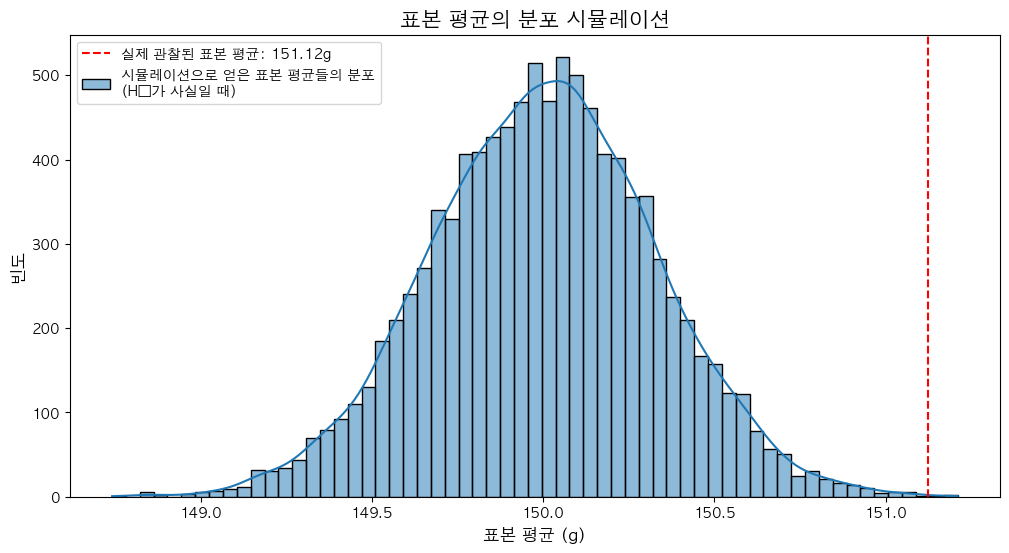

In [12]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 평균(loc) = 150g
# 표준편차는 우리가 가진 샘플의 표준편차를 사용한다고 가정
# 30개짜리 샘플을 10,000번 뽑기
num_simulations = 10000
sample_size = 30
simulated_means = []

# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
# 각 반복마다 H₀가 사실인 모집단에서 30개의 샘플을 뽑고, 그 평균을 simulated_means 리스트에 추가하세요.
for _ in range(num_simulations):
    simulated_sample = np.random.normal(
        loc=pop_mean,                   # 귀무가설 평균 = 150g
        scale=np.std(sample_weight, ddof=1),    # 표본 표준편차 사용
        size=sample_size                # 30개씩 뽑기
    )
    simulated_means.append(np.mean(simulated_sample))

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_means, kde=True, label='시뮬레이션으로 얻은 표본 평균들의 분포\n(H₀가 사실일 때)')
plt.axvline(x=np.mean(sample_weight), color='red', linestyle='--', 
            label=f'실제 관찰된 표본 평균: {np.mean(sample_weight):.2f}g')
plt.title("표본 평균의 분포 시뮬레이션", fontsize=15)
plt.xlabel("표본 평균 (g)", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요? (힌트: 4장에서 배운 개념)  
-> 귀무가설이 참(평균=150g)이라고 가정했을 때, 30개 표본 평균이 어떻게 분포하는지를 시뮬레이션한 결과.  
-> 표본 평균의 분포가 정규분포와 비슷한 이유는 중심극한정리(CLT) 때문임.  
2.  우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?  
-> 빨간 점선(151.12g)은 분포의 꼬리 부분에 위치 → 흔하지 않은 값  
-> p-value: 0.0019 > a: 0.05 → 귀무가설 기각. (그래프 상 극단 영역에 있는 값과 일치하는 해석.)  
3.  만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?  
-> 그래프의 거의 맨 오른쪽 꼬리 끝에 위치했을 것.  
-> 이는 관찰된 표본 평균이 귀무가설 하에서 거의 발생하지 않는 값임을 의미.
-> 공장 입장에서는 목표 중량 150g과 실제 생산 평균 사이에 심각한 차이가 있음을 뜻하므로, 생상 공정 점검 및 품질 관리 강화 같은 조치를 취해야 함.